Atualizando a biblioteca para plotagem de gráficos

In [1]:
!pip -q install plotly --upgrade

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Abrindo um arquivo CSV do drive

In [3]:
data = pd.read_csv('./dataset/breast-cancer.csv', sep=';')
data

FileNotFoundError: [Errno 2] No such file or directory: './dataset/breast-cancer.csv'

Verificando se há ausência de dados - true se houver ausência

In [ ]:
data.isnull()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

**Verificando uma instância antes da imputação**

Não tem o tipo NAN e sim a interrogação

In [ ]:
X_comNan = data.iloc[20] # linha 20
X_comNan

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                      ?
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

**Tratamento de linhas que contenham o '?'**

Vamos substituir todas as interrogações por 'NAN'

In [ ]:
import numpy as np
# Substitui Nan por um caracter desejado
data.replace('?', np.nan, inplace = True) # inplace = True também altera na base, não só na memória

In [ ]:
X_comNan = data.iloc[20] # linha 20
X_comNan

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                    NaN
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

In [ ]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

**Agora já temos os nossos dados ausentes!**

Vamos imputá-lo pela MODA?!

In [ ]:
data['node-caps'].fillna(data['node-caps'].mode()[0], inplace = True)

In [ ]:
data['breast-quad'].fillna(data['breast-quad'].mode()[0], inplace = True)

In [ ]:
data.isnull().sum()

In [ ]:
X_imputado = data.iloc[20] # linha 20
X_imputado

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                     no
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

**Contando e visualizando a quantidade de valores que temos em cada atributo**

In [ ]:
len(np.unique(data['age'])), len(np.unique(data['menopause'])), len(np.unique(data['tumor-size'])), len(np.unique(data['inv-nodes']))

(6, 3, 11, 7)

In [ ]:
!pip install --upgrade seaborn

((array(['0-4', '05/set', '15-19', '20-24', '25-29', '30-34', '35-39',
         '40-44', '45-49', '50-54', 'out/14'], dtype=object),
  array([ 8,  4, 30, 50, 54, 60, 19, 22,  3,  8, 28], dtype=int64)),
 <AxesSubplot:xlabel='tumor-size', ylabel='count'>)

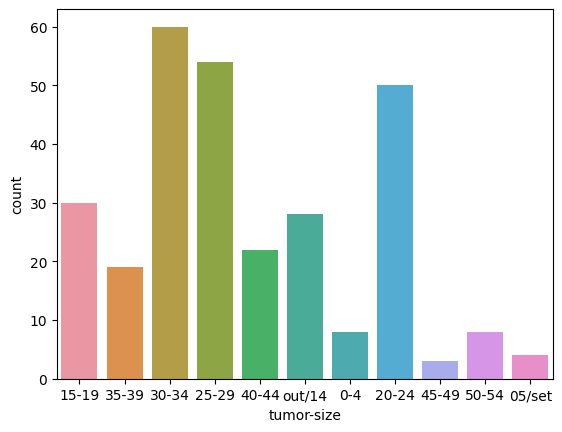

In [ ]:
import seaborn as sns
np.unique(data['tumor-size'], return_counts = True), sns.countplot(x = data['tumor-size'])

Substituindo dados inconsistentes

((array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
         '40-44', '45-49', '5-9', '50-54'], dtype=object),
  array([ 8, 28, 30, 50, 54, 60, 19, 22,  3,  4,  8], dtype=int64)),
 <AxesSubplot:xlabel='tumor-size', ylabel='count'>)

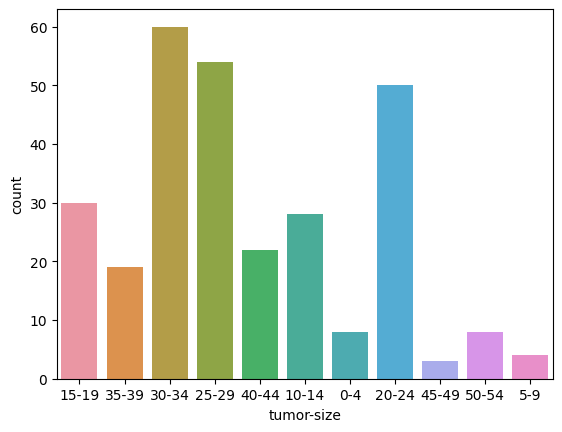

In [ ]:
data.replace('out/14', '10-14', inplace = True)
data.replace('05/set', '5-9', inplace = True)
np.unique(data['tumor-size'], return_counts=True), sns.countplot(x = data['tumor-size'])

((array(['0-2', '03/mai', '06/ago', '09/nov', '15-17', '24-26', 'dez/14'],
        dtype=object),
  array([213,  36,  17,  10,   6,   1,   3], dtype=int64)),
 <AxesSubplot:xlabel='inv-nodes', ylabel='count'>)

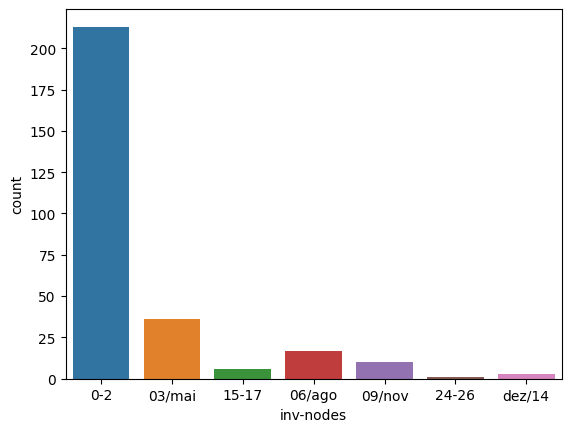

In [ ]:
np.unique(data['inv-nodes'], return_counts = True), sns.countplot(x = data['inv-nodes'])

((array(['0-2', '10-14', '15-17', '24-26', '3-4', '6-7', '9-10'],
        dtype=object),
  array([213,   3,   6,   1,  36,  17,  10], dtype=int64)),
 <AxesSubplot:xlabel='inv-nodes', ylabel='count'>)

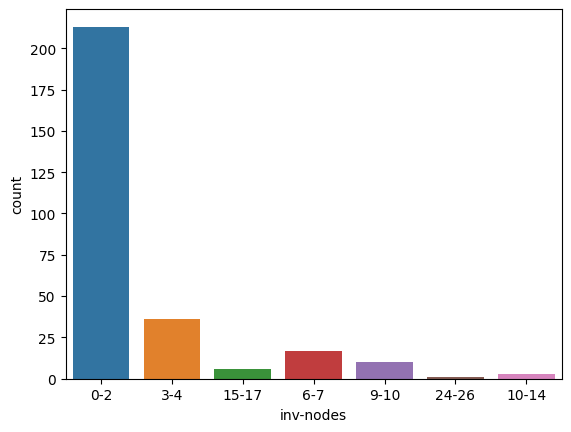

In [ ]:
data.replace('03/mai', '3-4', inplace = True)
data.replace('06/ago', '6-7', inplace = True)
data.replace('09/nov', '9-10', inplace = True)
data.replace('dez/14', '10-14', inplace = True)
np.unique(data['inv-nodes'], return_counts=True), sns.countplot(x = data['inv-nodes'])

**Contando quantidade de instâncias**

In [ ]:
np.unique(data['Class'], return_counts=True) 

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([201,  85], dtype=int64))

A classe 'no-recurrence-events' é a classe **majoritária** </br> 
A classe 'recurrence-events' é a classe **minoritária**

<AxesSubplot:xlabel='Class', ylabel='count'>

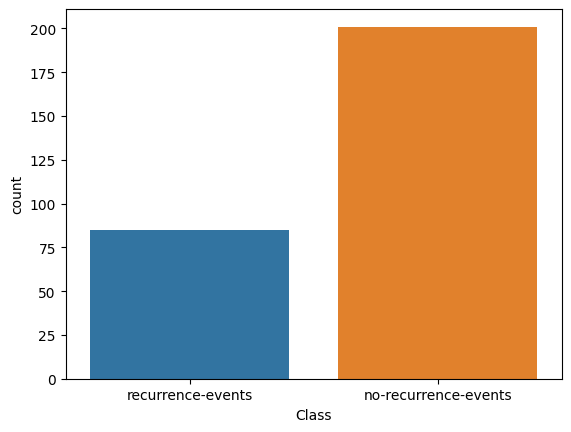

In [ ]:
sns.countplot(x = data['Class']) # base desbalanceada

Separando os atributos de entrada e de classe

In [ ]:
X_prev = data.iloc[:,0:9].values # i don't get the target attribute

Target Values - last column

In [ ]:
y_classe = data.iloc[:,9].values

Apagando as linhas com "NaN"

In [ ]:
# remove as linhas com NaN
data = data.dropna() 

Tratamento de dados categóricos (strings)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

Binarizando atributos nominais com duas opções de resposta

In [ ]:
label_encoder_NodeCaps = LabelEncoder()
label_encoder_Breast = LabelEncoder()
label_encoder_Irradiat = LabelEncoder()

In [ ]:
X_prev[:,4] = label_encoder_NodeCaps.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_Breast.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_Irradiat.fit_transform(X_prev[:,8])

In [ ]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 1, 'left_up', 0],
       ['50-59', 'ge40', '15-19', ..., 1, 'central', 0],
       ['50-59', 'ge40', '35-39', ..., 0, 'left_low', 0],
       ...,
       ['30-39', 'premeno', '30-34', ..., 1, 'right_up', 0],
       ['50-59', 'premeno', '15-19', ..., 1, 'left_low', 0],
       ['50-59', 'ge40', '40-44', ..., 0, 'right_up', 0]], dtype=object)

| OneHotEncoder - Vamos **binarizar atributos não ordinais**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,5,7])], remainder="passthrough")

In [ ]:
X_prev = onehotencoder.fit_transform(X_prev)

In [ ]:
X_prev

Metódo de amostragem **Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# | 80%  |  20%  |
x_treino, x_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)


Pickling is used to store python objects

In [ ]:
import pickle

with open('./sample_data/breast_cancer.pkl', mode = 'wb') as f:
    pickle.dump([x_treino, x_teste, y_treino, y_teste], f)